In [1]:
import tensorflow as tf

In [2]:
def Conv2D_Block(input_tensor , n_filters):
  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(input_tensor)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)

  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)

  return x

In [3]:
def U_Net(img_tensor , n_filters = 16):
  conv1 = Conv2D_Block(img_tensor , n_filters * 1)
  pool1 = tf.keras.layers.MaxPooling2D((2 , 2))(conv1)
  pool1 = tf.keras.layers.Dropout(0.05)(pool1)

  conv2 = Conv2D_Block(pool1 , n_filters * 2)
  pool2 = tf.keras.layers.MaxPooling2D((2 , 2))(conv2)
  pool2 = tf.keras.layers.Dropout(0.05)(pool2)

  conv3 = Conv2D_Block(pool2 , n_filters * 4)
  pool3 = tf.keras.layers.MaxPooling2D((2 , 2))(conv3)
  pool3 = tf.keras.layers.Dropout(0.05)(pool3)

  conv4 = Conv2D_Block(pool3 , n_filters * 8)
  pool4 = tf.keras.layers.MaxPooling2D((2 , 2))(conv4)
  pool4 = tf.keras.layers.Dropout(0.05)(pool4)

  conv5 = Conv2D_Block(pool4 , n_filters * 16)

  pool6 = tf.keras.layers.Conv2DTranspose(n_filters * 8 , (3 , 3) , (2, 2) , padding = 'same')(conv5)
  pool6 = tf.keras.layers.concatenate([pool6 , conv4])
  pool6 = tf.keras.layers.Dropout(0.05)(pool6)
  conv6 = Conv2D_Block(pool6 , n_filters * 8)

  pool7 = tf.keras.layers.Conv2DTranspose(n_filters * 4 , (3 , 3) , (2 , 2) , padding = 'same')(conv6)
  pool7 = tf.keras.layers.concatenate([pool7 , conv3])
  pool7 = tf.keras.layers.Dropout(0.05)(pool7)
  conv7 = Conv2D_Block(pool7 , n_filters * 4)

  pool8 = tf.keras.layers.Conv2DTranspose(n_filters * 2 , (3 , 3) , (2 , 2) , padding = 'same')(conv7)
  pool8 = tf.keras.layers.concatenate([pool8 , conv2])
  pool8 = tf.keras.layers.Dropout(0.05)(pool8)
  conv8 = Conv2D_Block(pool8 , n_filters * 2)

  pool9 = tf.keras.layers.Conv2DTranspose(n_filters * 1 , (3 , 3) , (2 , 2) , padding = 'same')(conv8)
  pool9 = tf.keras.layers.concatenate([pool9 , conv1])
  pool9 = tf.keras.layers.Dropout(0.05)(pool9)
  conv9 = Conv2D_Block(pool9 , n_filters * 1)

  output = tf.keras.layers.Conv2D(1 , (1 , 1) , activation = 'sigmoid')(conv9)

  u_net = tf.keras.Model(inputs = [img_tensor] , outputs = [output])

  return u_net

In [4]:
!pip install PyDrive

In [5]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
# Install gdown if not already installed
!pip install gdown

import gdown
import zipfile
import os

# Define the file ID and the destination path
file_id = '17JT6hkbqrMJBuh_EV8bh82h3WPRbic1d'
destination = '/content/example.zip'

# Construct the download URL and download the file
download_url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(download_url, destination, quiet=False)

# Define the extraction path
extract_path = '/content/extracted_files/'

# Create a directory to extract files to
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(destination, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
extracted_files = os.listdir(extract_path)
print('Extracted files:', extracted_files)


/usr/local/lib/python3.10/dist-packages/gdown/download.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = bs4.BeautifulSoup(line, features="html.parser")


FileURLRetrievalError: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=17JT6hkbqrMJBuh_EV8bh82h3WPRbic1d

but Gdown can't. Please check connections and permissions.

In [7]:
file_id = '17JT6hkbqrMJBuh_EV8bh82h3WPRbic1d'
downloaded = drive.CreateFile({'id': file_id})
destination = '/content/example.zip'
downloaded.GetContentFile(destination)

# Define the extraction path
extract_path = '/content/extracted_files/'

# Create a directory to extract files to
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(destination, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
extracted_files = os.listdir(extract_path)
print('Extracted files:', extracted_files)

Extracted files: ['train', 'test', 'train_masks.csv', 'sample_submission.csv']


In [9]:
import pandas as pd
d = pd.read_csv('/content/extracted_files/train_masks.csv')

In [10]:
d.head()

,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN


In [11]:
import os
import re

In [12]:
train_path = os.listdir('/content/extracted_files/train')
test_path = os.listdir('/content/extracted_files/test')

print(len(train_path) , len(test_path))

11270 5508


In [13]:
reg = re.compile("[0-9]+")

temp1 = list(map(lambda x: reg.match(x).group(), train_path))
temp1 = list(map(int, temp1))

temp2 = list(map(lambda x: reg.match(x.split("_")[1]).group(), train_path))
temp2 = list(map(int, temp2))

train_path = [x for _,_,x in sorted(zip(temp1, temp2, train_path))]
train_path[:20]

['1_1.tif',
 '1_1_mask.tif',
 '1_2.tif',
 '1_2_mask.tif',
 '1_3.tif',
 '1_3_mask.tif',
 '1_4.tif',
 '1_4_mask.tif',
 '1_5.tif',
 '1_5_mask.tif',
 '1_6.tif',
 '1_6_mask.tif',
 '1_7.tif',
 '1_7_mask.tif',
 '1_8.tif',
 '1_8_mask.tif',
 '1_9.tif',
 '1_9_mask.tif',
 '1_10.tif',
 '1_10_mask.tif']

In [14]:
len(train_path)

11270

In [15]:
train_image = []
train_mask = []

for index , item in enumerate(train_path):
  if index % 2 == 0:
    train_image.append(item)
  else:
    train_mask.append(item)

In [16]:
print(len(train_image))
print(len(train_mask))

5635
5635


In [17]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
import skimage


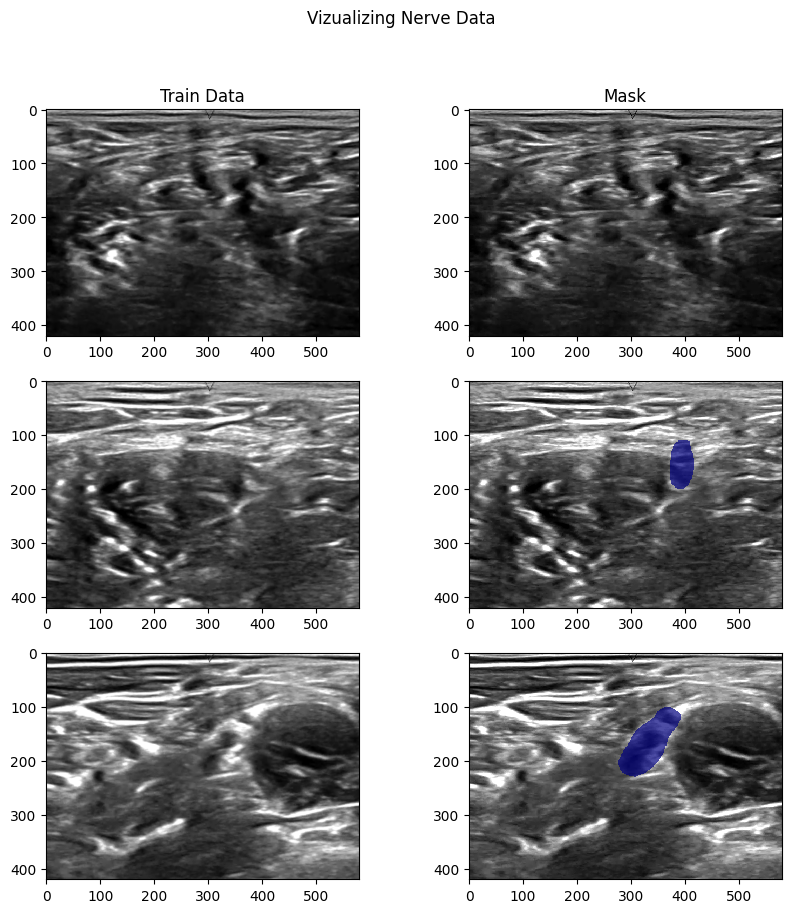

In [18]:
fig , ax = plt.subplots(3 , 2 , figsize=[10 , 10])
fig.suptitle('Vizualizing Nerve Data')
ax[0 , 0].set_title('Train Data')
ax[0 , 1].set_title('Mask')

# print(ax.shape)
for i in range(0 , 3):
  ind = random.randint(0 , len(train_image))
  img1 = np.array(Image.open("/content/extracted_files/train/" + str(train_image[ind])))
  ax[i , 0].imshow(img1 , cmap = 'gray')

  img2 = np.array(Image.open("/content/extracted_files/train/" + str(train_mask[ind])))
  img2 = np.ma.masked_where(img2 == 0, img2)
  ax[i , 1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
  ax[i , 1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)

plt.show()

In [19]:
X = np.zeros((len(train_image), 128, 128, 1), dtype=np.float32)
y = np.zeros((len(train_image), 128, 128, 1), dtype=np.float32)

In [20]:
for n , img_name in enumerate(train_image):
  img = tf.keras.preprocessing.image.load_img('/content/extracted_files/train/'+img_name , grayscale=True)
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  X[n] = in_img / 255.0

for n , img_name in enumerate(train_mask):
  img = tf.keras.preprocessing.image.load_img('/content/extracted_files/train/'+img_name , grayscale=True)
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  y[n] = in_img / 255.0

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [21]:
from sklearn.model_selection import train_test_split
X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size = 0.1 , random_state = 42)

In [40]:
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall
img_tensor = tf.keras.layers.Input((128 , 128 , 1) , name = 'img')
model = U_Net(img_tensor)
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'binary_crossentropy',
             metrics=['accuracy', Precision(), Recall()])

In [41]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_38 (Conv2D)          (None, 128, 128, 16)         160       ['img[0][0]']                 
                                                                                                  
 batch_normalization_36 (Ba  (None, 128, 128, 16)         64        ['conv2d_38[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_36 (Activation)  (None, 128, 128, 16)         0         ['batch_normalization_36

In [42]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('model_nerve.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [46]:
results = model.fit(X_train, y_train, batch_size=32, epochs=50, callbacks=callbacks,\
                    validation_data=(X_valid, y_valid))

Epoch 1/50
159/159 [==============================] - ETA: 0s - loss: 0.0162 - accuracy: 0.9875 - precision: 0.8428 - recall: 0.5204
Epoch 1: val_loss did not improve from 0.02285
159/159 [==============================] - 22s 136ms/step - loss: 0.0162 - accuracy: 0.9875 - precision: 0.8428 - recall: 0.5204 - val_loss: 0.0265 - val_accuracy: 0.9849 - val_precision: 0.6877 - val_recall: 0.5149 - lr: 0.0010
Epoch 2/50
159/159 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9878 - precision: 0.8532 - recall: 0.5293
Epoch 2: val_loss did not improve from 0.02285
159/159 [==============================] - 22s 137ms/step - loss: 0.0153 - accuracy: 0.9878 - precision: 0.8532 - recall: 0.5293 - val_loss: 0.0274 - val_accuracy: 0.9849 - val_precision: 0.6930 - val_recall: 0.4759 - lr: 0.0010
Epoch 3/50
159/159 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9878 - precision: 0.8520 - recall: 0.5350
Epoch 3: val_loss did not improve from 0.02285
15

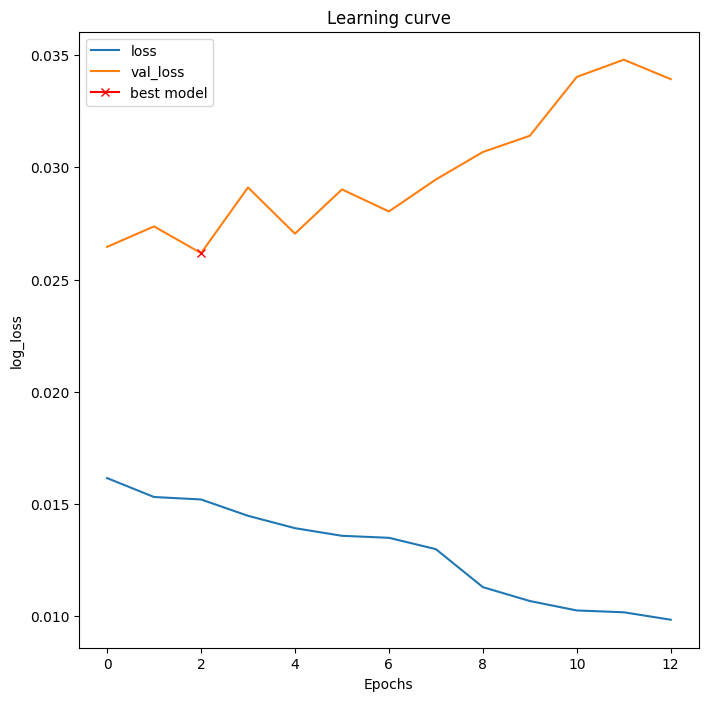

In [47]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [48]:
model.load_weights('model_nerve.h5')

In [49]:
model.evaluate(X_valid, y_valid, verbose=1)


18/18 [==============================] - 1s 31ms/step - loss: 0.0228 - accuracy: 0.9859 - precision: 0.7828 - recall: 0.3654


[0.02284540794789791,
 0.9858561754226685,
 0.7827538251876831,
 0.3654401898384094]

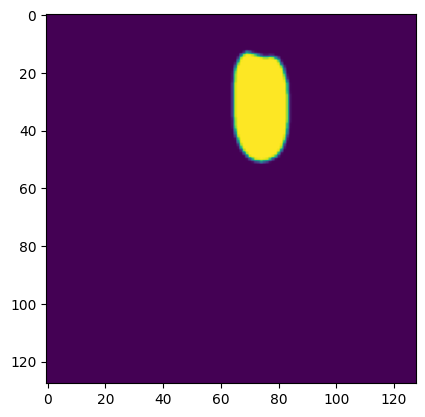

In [50]:
plt.imshow(y_valid[0].squeeze())

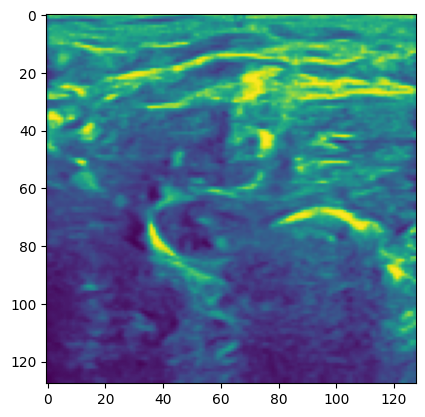

In [51]:
img_name = '1000.tif'
img = tf.keras.preprocessing.image.load_img('/content/extracted_files/test/'+img_name , grayscale=True)
in_img = tf.keras.preprocessing.image.img_to_array(img)
in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
test = in_img / 255.0
plt.imshow(test.squeeze())

In [52]:
prediction = model.predict(np.expand_dims(test , 0))

1/1 [==============================] - 1s 628ms/step


In [53]:
prediction.shape

(1, 128, 128, 1)

In [54]:
prediction.squeeze().shape

(128, 128)

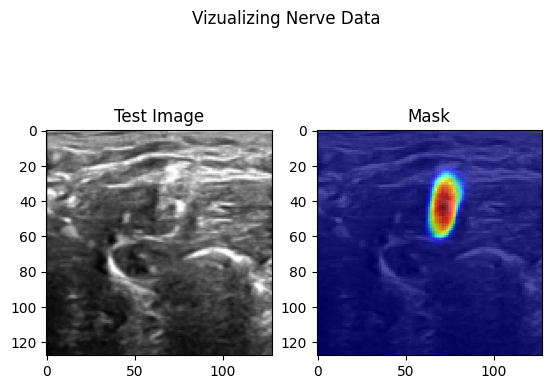

In [55]:
fig , ax = plt.subplots(1 , 2)
fig.suptitle('Vizualizing Nerve Data')
ax[0].set_title('Test Image')
ax[1].set_title('Mask')
img1 = test.squeeze()
ax[0].imshow(img1 , cmap = 'gray')

img2 = prediction.squeeze()
img2 = np.ma.masked_where(img2 == 0, img2)
ax[1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
ax[1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)

plt.show()